In [1]:
import sys

import os
print(os.getcwd())

/Users/schnuckiputz/other/git/2022-CHI-neuroadaptive-haptics/neuro_haptics/aleks


In [2]:
sys.path.append('rl/')
print(sys.path) 

import utils
from utils import *

['/Users/schnuckiputz/other/git/2022-CHI-neuroadaptive-haptics/neuro_haptics/aleks', '/opt/homebrew/Caskroom/miniforge/base/lib/python39.zip', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/lib-dynload', '', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages', '/Users/schnuckiputz/other/code/brain-course-drl-project/gym-grid', '/Users/schnuckiputz/other/git/sam-hq', 'rl/']


In [3]:
print(sys.path) 

['/Users/schnuckiputz/other/git/2022-CHI-neuroadaptive-haptics/neuro_haptics/aleks', '/opt/homebrew/Caskroom/miniforge/base/lib/python39.zip', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/lib-dynload', '', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages', '/Users/schnuckiputz/other/code/brain-course-drl-project/gym-grid', '/Users/schnuckiputz/other/git/sam-hq', 'rl/']


100%|██████████| 1/1 [00:00<00:00, 12.56it/s]

Accuracy: 0.0
Mean episode length: 1001.0


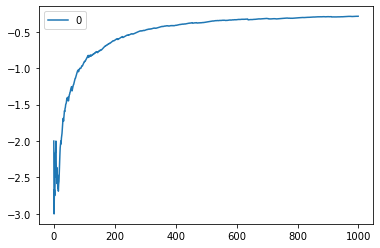

In [4]:
rewards = []

params_new = {
    # Runner parameters
    'max_steps': 1000,
    'num_episodes': 1,
    'convergence_count_start': 1000,
    }

params = default_params() | params_new

from ucbq_agent_stateless import UCBQAgent

# params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params_new)
print(f'Accuracy: {accuracy}')    
print(f'Mean episode length: {np.mean(episode_lengths)}')
rewards.append(rewards_all_experiments)

# Beware, VS Code variable inspector can show wrong Size value

# Apply get_mean_rewards_across_episodes to each element in rewards
mean_rewards = [get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards]

pd.DataFrame(mean_rewards).T.plot()